In [64]:
# Sercan AYDIN
# 150170707
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
##########################
df1 = pd.read_csv("train1.csv")
df2 = pd.read_csv("train2.csv")
df2m = pd.read_csv("train2_modified.csv") # will be used in Part D
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

# PART A:

In [65]:
# data frames for each dataset and class.
df1_class0 = df1[df1['y'] == 0]
df1_class1 = df1[df1['y'] == 1]
df2_class0 = df2[df2['y'] == 0]
df2_class1 = df2[df2['y'] == 1]

# covariance matrices for each dataset and class.
cov_df1_class0 = df1_class0[['x1', 'x2']].cov()
cov_df1_class1 = df1_class1[['x1', 'x2']].cov()
cov_df2_class0 = df2_class0[['x1', 'x2']].cov()
cov_df2_class1 = df2_class1[['x1', 'x2']].cov()

C:\Users\SERCAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\SERCAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SERCAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\SERCAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\SERCAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\SERCAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\SERCAN\An

[Text(0, -1.0, ''), Text(0, 0.0, 'x1'), Text(0, 1.0, 'x2'), Text(0, 2.0, '')]

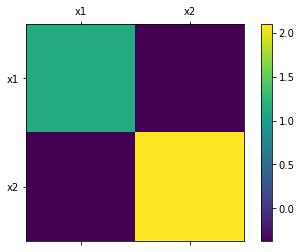

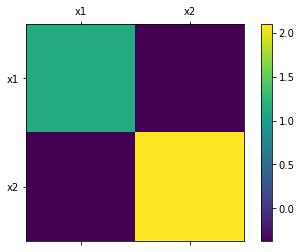

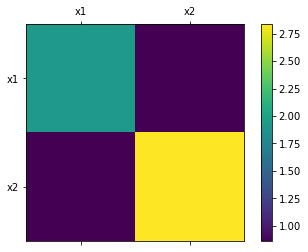

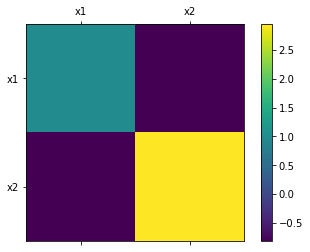

In [66]:
#covariance matrices:

# Covariance matrix of trainingSet1's class 0
# Features x1 & x2 have negative covariance.
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_df1_class0,interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

# Covariance matrix of trainingSet1's class 1
# Features x1 & x2 have negative covariance.
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_df1_class1,interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

# Covariance matrix of trainingSet2's class 0
# Features x1 & x2 have positive covariance.
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_df2_class0,interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

# Covariance matrix of trainingSet2's class 1
# Features x1 & x2 have negative covariance.
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_df2_class1,interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)


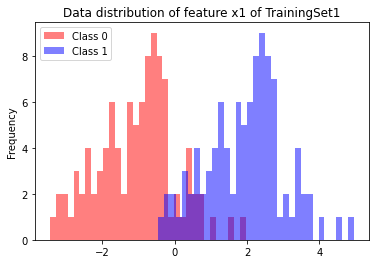

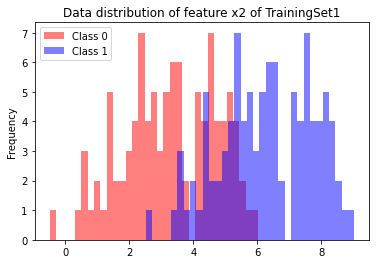

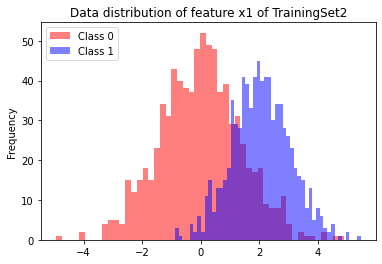

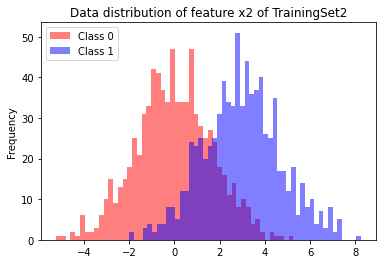

In [67]:
# PART A3:
# Histogram for TrainingSet1 - Feature1
# Overlap is minimal, which means x1 is a suitable feature for classification.
plt.hist(df1_class0['x1'], color='red', alpha=0.5, bins=33, label="Class 0")
plt.hist(df1_class1['x1'], color='blue', alpha=0.5, bins=33, label="Class 1")
plt.legend(loc="upper left")
plt.gca().set(title='Data distribution of feature x1 of TrainingSet1', ylabel='Frequency')
plt.show()

# Histogram for TrainingSet1 - Feature2
# There is some overlap, but the means are still separated, which means it is suitable for classification.
plt.hist(df1_class0['x2'], color='red', alpha=0.5, bins=33, label="Class 0")
plt.hist(df1_class1['x2'], color='blue', alpha=0.5, bins=33, label="Class 1")
plt.legend(loc="upper left")
plt.gca().set(title='Data distribution of feature x2 of TrainingSet1', ylabel='Frequency')
plt.show()

# Histogram for TrainingSet2 - Feature1
# There is some overlap, but the means are clearly separated, which means it is suitable for classification.
plt.hist(df2_class0['x1'], color='red', alpha=0.5, bins=50, label="Class 0")
plt.hist(df2_class1['x1'], color='blue', alpha=0.5, bins=50, label="Class 1")
plt.legend(loc="upper left")
plt.gca().set(title='Data distribution of feature x1 of TrainingSet2', ylabel='Frequency')
plt.show()

# Histogram for TrainingSet2 - Feature2
# There is some overlap, and the means are separated, so it is suitable for classification, but not as much as the other examples.
plt.hist(df2_class0['x2'], color='red', alpha=0.5, bins=50, label="Class 0")
plt.hist(df2_class1['x2'], color='blue', alpha=0.5, bins=50, label="Class 1")
plt.legend(loc="upper left")
plt.gca().set(title='Data distribution of feature x2 of TrainingSet2', ylabel='Frequency')
plt.show()

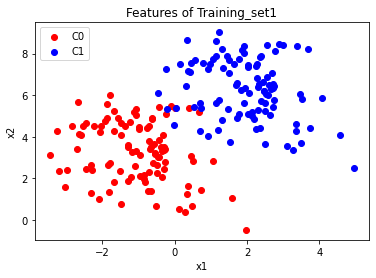

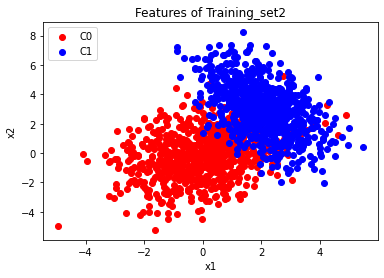

In [68]:
# PART A4:
# Plot the features of Training Set 1
plt.scatter(df1_class0['x1'], df1_class0['x2'], color="red", label="C0")
plt.scatter(df1_class1['x1'], df1_class1['x2'], color="blue", label="C1")
plt.legend(loc="upper left")
plt.gca().set(title="Features of Training_set1", xlabel="x1", ylabel="x2")
plt.show()

# Plot the features of Training Set 2
plt.scatter(df2_class0['x1'], df2_class0['x2'], color="red", label="C0")
plt.scatter(df2_class1['x1'], df2_class1['x2'], color="blue", label="C1")
plt.legend(loc="upper left")
plt.gca().set(title="Features of Training_set2", xlabel="x1", ylabel="x2")
plt.show()

# PART B1:

In [95]:
def mean(x):
    numpy_array = np.array([x.mean()["x1"], x.mean()["x2"]])
    return numpy_array

def calculate_error(arr1, arr2, cov1, cov2, mean1, mean2, x1, x2):
    correct = 0
    incorrect = 0
    for i in arr1:
        if(trainBayes(cov1, cov2, mean1, mean2, x1, x2, i) == 0):
            correct+=1
        else:
            incorrect += 1
    for i in arr2:
        if(trainBayes(cov1, cov2, mean1, mean2, x1, x2, i) == 1):
            correct+=1
        else:
            incorrect += 1   
    err = 100*incorrect/(correct+incorrect)
    return err

mean_df1_class0 = mean(df1_class0)
mean_df1_class1 = mean(df1_class1)
mean_df2_class0 = mean(df2_class0)
mean_df2_class1 = mean(df2_class1)

print("train1 class0 mean: ", mean_df1_class0, "\ntrain1 class0 covariance:\n", cov_df1_class0, "\n")
print("train1 class1 mean: ", mean_df1_class1, "\ntrain1 class1 covariance:\n", cov_df1_class1, "\n")
print("train2 class0 mean: ", mean_df2_class0, "\ntrain2 class0 covariance:\n", cov_df2_class0, "\n")
print("train2 class1 mean: ", mean_df2_class1, "\ntrain2 class1 covariance:\n", cov_df2_class1, "\n")

train1 class0 mean:  [-1.04624698  3.26924606] 
train1 class0 covariance:
           x1        x2
x1  1.147041 -0.376974
x2 -0.376974  2.104315 

train1 class1 mean:  [1.95375302 6.26924606] 
train1 class1 covariance:
           x1        x2
x1  1.147041 -0.376974
x2 -0.376974  2.104315 

train2 class0 mean:  [ 0.00246486 -0.01971604] 
train2 class0 covariance:
           x1        x2
x1  1.922112  0.857977
x2  0.857977  2.839344 

train2 class1 mean:  [2.0536608  2.97765078] 
train2 class1 covariance:
           x1        x2
x1  0.997699 -0.818803
x2 -0.818803  2.949629 



# PART B2 - B3:

In [96]:
cov10 = cov_df1_class0.to_numpy()
cov11 = cov_df1_class1.to_numpy()
cov20 = cov_df2_class0.to_numpy()
cov21 = cov_df2_class1.to_numpy()

test1class0  = test1[test1['y']==0]
test1class1  = test1[test1['y']==1]
numpyTest1C0 = test1class0[["x1", "x2"]].to_numpy()
numpyTest1C1 = test1class1[["x1", "x2"]].to_numpy()
test2class0  = test2[test2['y']==0]
test2class1  = test2[test2['y']==1]
numpyTest2C0 = test2class0[["x1", "x2"]].to_numpy()
numpyTest2C1 = test2class1[["x1", "x2"]].to_numpy()

numpy_df1class0 = df1_class0[["x1", "x2"]].head(2).to_numpy()
numpy_df1class1 = df1_class1[["x1", "x2"]].head(2).to_numpy()
numpy_df2class0 = df2_class0[["x1", "x2"]].head(2).to_numpy()
numpy_df2class1 = df2_class1[["x1", "x2"]].head(2).to_numpy()

P1c0 = numpy_df1class0.shape[1]/(numpy_df1class0.shape[1] + numpy_df1class1.shape[1])
P2c0 = numpy_df2class0.shape[1]/(numpy_df2class0.shape[1] + numpy_df2class1.shape[1])
P1c1 = 1 - P1c0
P2c1 = 1 - P2c0

# Computing g(x)
def trainBayes(cov0, cov1, mean0, mean1, p0, p1, testX):
    if((round(cov0[0][0], 5) == round(cov1[0][0], 5) and round(cov0[0][1], 5) == round(cov1[0][1], 5) and 
       round(cov0[1][0], 5) == round(cov1[1][0], 5) and round(cov0[1][1], 5) == round(cov1[1][1], 5)) and 
       (mean0[0] != mean1[0] or mean0[1] != mean1[1])):
        g0 = np.dot(np.dot(mean0, np.linalg.inv(cov0)), testX.transpose()) + np.log(p0) - (1/2)*(np.dot(np.dot(mean0, np.linalg.inv(cov0)), mean0.transpose()))
        g1 = np.dot(np.dot(mean1, np.linalg.inv(cov1)), testX.transpose()) + np.log(p1) - (1/2)*(np.dot(np.dot(mean1, np.linalg.inv(cov1)), mean1.transpose()))
        if g0 < g1:
            return 1
        else:
            return 0
    elif(round(cov0[0][0], 5) == round(cov0[1][1], 5) and round(cov0[0][1], 5) == 0 and round(cov0[1][0], 5) == 0 and
        round(cov1[0][0], 5) == round(cov1[1][1], 5) and round(cov1[0][1], 5) == 0 and round(cov1[1][0], 5) == 0):
        g0 = np.dot(mean0, testX.transpose())/cov0[0][0] - np.log(p0) + np.dot(mean0, mean0.transpose())/2*cov0[0][0]
        g1 = np.dot(mean1, testX.transpose())/cov1[0][0] - np.log(p1) + np.dot(mean1, mean1.transpose())/2*cov1[0][0]
        if g1 < g0:
            return 0
        else:
            return 1
    else: # general case
        g0 = -(0.5*np.dot(np.dot((testX - mean0), np.linalg.inv(cov0)), (testX-mean0).transpose()) ) - (0.5*np.log(np.linalg.det(cov0))) + np.log(p0)
        g1 = -(0.5*np.dot(np.dot((testX - mean1), np.linalg.inv(cov1)), (testX-mean1).transpose()) ) - (0.5*np.log(np.linalg.det(cov1))) + np.log(p1)
        if g0 > g1:
            return 0
        else:
            return 1

error1 = calculate_error(numpyTest1C0, numpyTest1C1, cov10, cov11, mean_df1_class0, mean_df1_class1, P1c0, P1c1)
error2 = calculate_error(numpyTest2C0, numpyTest2C1, cov20, cov21, mean_df2_class0, mean_df2_class1, P2c0, P2c1)
 
print(f"Error for Test Set 1 data: {error1:.3}%")

print(f"Error for Test Set 2 data: {error2:.3}%")

Error for Test Set 1 data: 2.0%
Error for Test Set 2 data: 11.5%


# PART C:

In [97]:
# PART C1:
merged1 = pd.merge(df1, test1, how='outer')
merged2 = pd.merge(df2, test2, how='outer')
data1 = merged1.to_numpy()
data2 = merged2.to_numpy()

kf = KFold(n_splits = 5, random_state=1, shuffle=True)

def get_avg_error(errors):
    total_error = 0
    for e in errors:
        total_error += e
    return total_error / len(errors)

# PART C2:
def cross_validation(data1):
    errorArray =[]
    for train_index, test_index in kf.split(data1):    
        xtrain, xtest = data1[train_index], data1[test_index]
        
        df = pd.DataFrame(data=xtrain, columns=["x1", "x2", "y"])
        class0 = df[df['y'] == 0]
        class1 = df[df['y'] == 1]
        cov0 = class0.cov()[['x1', 'x2']].head(2).to_numpy()
        cov1 = class1.cov()[['x1', 'x2']].head(2).to_numpy()
        mean0 = mean(class0)
        mean1 = mean(class1)
        P0 = class0[['x1', 'x2']].to_numpy().shape[1]/(class0[['x1', 'x2']].to_numpy().shape[1] + class1[['x1', 'x2']].to_numpy().shape[1])
        P1 = 1-P0

        dft = pd.DataFrame(data=xtest, columns=["x1", "x2", "y"])
        testS0 = dft[round(dft['y'])==0]
        test0 = testS0[["x1", "x2"]].to_numpy()
        testS1 = dft[round(dft['y'])==1]
        test1 = testS1[["x1", "x2"]].to_numpy()
        
        e1 = calculate_error(test0,test1,cov0,cov1,mean0,mean1,P0,P1)
        errorArray.append(e1)
    return errorArray

# PART C3:
errorArr = cross_validation(data1)
errorArr2 = cross_validation(data2)

avg_error1 = get_avg_error(errorArr)
avg_error2 = get_avg_error(errorArr2)
print(f"Average error for Combined Set 1: {avg_error1:.3}")
print(f"Average error for Combined Set 1: {avg_error2:.4}")

# Part C4:
print(f"{error1:.3}%\tvs.\t{avg_error1:.3}%")
print(f"{error2:.3}%\tvs.\t{avg_error2:.4}%")

"""
C4) Interpretation:
it can be seen that using the random single split of the dataset performed better when the dataset was small (test1). 
But, 5-fold cross-validation performed better when the dataset was larger(test2).

5-fold CV is more reliable, because all the available data are used iteratively for training and testing
rather than being split into training and testing datasets once. This increases the confidence of the obtained model.
"""


Average error for Combined Set 1: 3.33
Average error for Combined Set 1: 10.25
2.0%	vs.	3.33%
11.5%	vs.	10.25%


'\nC4) Interpretation:\nit can be seen that using the random single split of the dataset performed better when the dataset was small (test1). \nBut, 5-fold cross-validation performed better when the dataset was larger(test2).\n\n5-fold CV is more reliable, because all the available data are used iteratively for training and testing\nrather than being split into training and testing datasets once. This increases the confidence of the obtained model.\n'

# PART D:

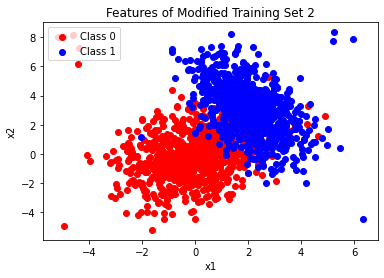

'\nI notice that there are some outliers and that the separation of the classes is not as clear as it was on Training Set 2,\ni.e., there are class0 samples among class1 samples and vice versa.\n'

In [98]:
# Part D1:
# Plot the features of Modified Training Set 2
df2m_class0 = df2m[df2m['y'] == 0]
df2m_class1 = df2m[df2m['y'] == 1]
plt.scatter(df2m_class0['x1'], df2m_class0['x2'], color="red", label="Class 0")
plt.scatter(df2m_class1['x1'], df2m_class1['x2'], color="blue", label="Class 1")
plt.legend(loc="upper left")
plt.gca().set(title="Features of Modified Training Set 2", xlabel="x1", ylabel="x2")
plt.show()

"""
I notice that there are some outliers and that the separation of the classes is not as clear as it was on Training Set 2,
i.e., there are class0 samples among class1 samples and vice versa.
"""

In [99]:
# PART D2:
df10_cov = df2m_class0.cov()[["x1", "x2"]].head(2).to_numpy()
df11_cov = df2m_class1.cov()[["x1", "x2"]].head(2).to_numpy()

mean0 = mean(df2m_class0)
mean1 = mean(df2m_class1)

numpy_df1class0 = df2m_class0[["x1", "x2"]].head(2).to_numpy()
numpy_df1class1 = df2m_class1[["x1", "x2"]].head(2).to_numpy()
P0 = numpy_df1class0.shape[1]/(numpy_df1class0.shape[1] + numpy_df1class1.shape[1])
P1 = 1 - P1c0

test2 = pd.read_csv("test2.csv")
test2class0 = test2[test2['y']==0]
test2class1 = test2[test2['y']==1]
numpyTest2Class0 = test2class0[["x1", "x2"]].to_numpy()
numpyTest2Class1 = test2class1[["x1", "x2"]].to_numpy()

error_last = calculate_error(numpyTest2Class0, numpyTest2Class1, df10_cov, df11_cov, mean0, mean1, P0, P1)
print(f"Error for Modified Training Set 2: {error_last:.4}%")

Error for Modified Training Set 2: 12.25%


In [100]:
# PART D3:
print(f"Dataset2: {error2:.4}%\t\tvs.\tDataset2_modified: {error_last:.4}%")

"""
The model performed better when it was trained using Dataset2 compared to when it was trained using Dataset2_modified.
We can conclude that the Bayes classifier works better when the data whose samples are clearly separated into classes and
contains little-to-no outliers. Error rate being a bit higher for modified version concludes that 
Bayes classifier is reasonably affected by outliers because it does not have a special mechanism to handle them.
"""

Dataset2: 11.5%		vs.	Dataset2_modified: 12.25%


'\nThe model performed better when it was trained using Dataset2 compared to when it was trained using Dataset2_modified.\nWe can conclude that the Bayes classifier works better when the data whose samples are clearly separated into classes and\ncontains little-to-no outliers. Error rate being a bit higher for modified version concludes that \nBayes classifier is reasonably affected by outliers because it does not have a special mechanism to handle them.\n'